In [66]:
import pickle
import random

import numpy as np
import matplotlib.pyplot as plt
import torch

from utils import conditional_monotonicity_check, get_preds_per_exit, get_acc_per_exit, anytime_product

In [67]:
# with open('../output/logits/cifar10.pkl', 'rb') as f:
# with open('../output/logits/cifar10_2.pkl', 'rb') as f:
with open('../output/logits/cifar10_LARGE.pkl', 'rb') as f:
    data = pickle.load(f)

logits, targets = data

B = max([len(x) for x in logits])
print(B)
for i in range(len(logits)):
    while len(logits[i]) < B:
        logits[i].append(logits[i][-1])

logits = torch.cat([torch.stack(tensors) for tensors in logits], dim=1)
# logits = np.concatenate([np.stack(tensors) for tensors in logits], axis=1)

targets = torch.cat(targets, dim=0)

19


In [68]:
logits.shape, targets.shape

(torch.Size([19, 10000, 10]), torch.Size([10000]))

In [69]:
# probs = torch.softmax(logits, dim=2)
probs = torch.softmax(logits[1:9, :, :], dim=2)
preds = get_preds_per_exit(probs)
acc = get_acc_per_exit(preds, targets)

In [70]:
# L, N, C = logits.shape

# # need to shift logits to obtain (somewhat) comparable results
# probs_pa = anytime_product(logits[1:, :, :] + 10., weights=(torch.arange(1, L, 1, dtype=float) / (L - 1)))
# preds_pa = get_preds_per_exit(probs_pa)
# acc_pa = get_acc_per_exit(preds_pa, targets)

In [71]:
acc

[tensor(0.2940),
 tensor(0.5966),
 tensor(0.7502),
 tensor(0.7918),
 tensor(0.8076),
 tensor(0.8171),
 tensor(0.8160),
 tensor(0.8235)]

In [72]:
# acc_pa

In [73]:
conditional_monotonicity_check(targets, probs)

{0.01: 69.65, 0.05: 52.6, 0.1: 42.07, 0.2: 28.9, 0.5: 9.04}

In [63]:
# conditional_monotonicity_check(targets, probs_pa)

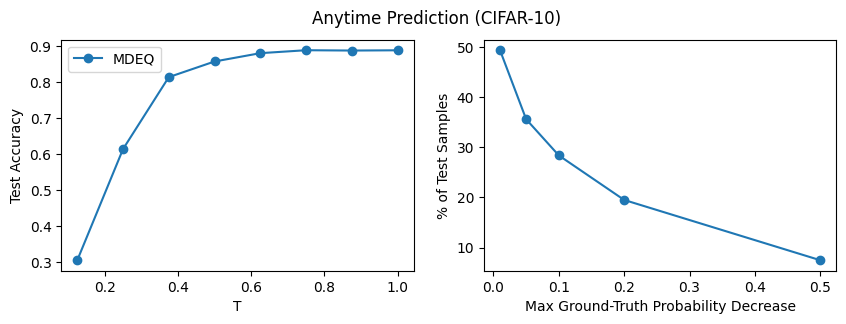

In [64]:
early_exits = [(i + 1) / len(acc) for i in range(len(acc))]
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].plot(early_exits, torch.stack(acc, dim=0).cpu().numpy(), label='MDEQ', marker='o',)
ax[0].legend()
ax[0].set_ylabel('Test Accuracy')
ax[0].set_xlabel('T')

modal_probs = conditional_monotonicity_check(targets, probs)
ax[1].plot(modal_probs.keys(), modal_probs.values(), marker='o', label='MDEQ')

ax[1].set_xlabel('Max Ground-Truth Probability Decrease')
ax[1].set_ylabel('% of Test Samples')


plt.suptitle(f'Anytime Prediction (CIFAR-10)')
plt.show()

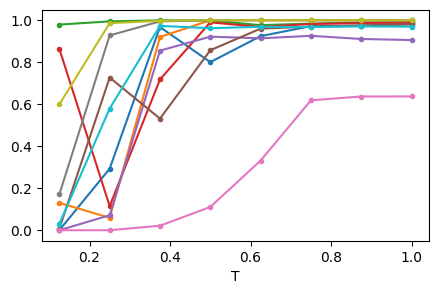

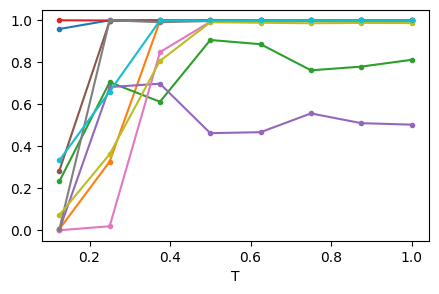

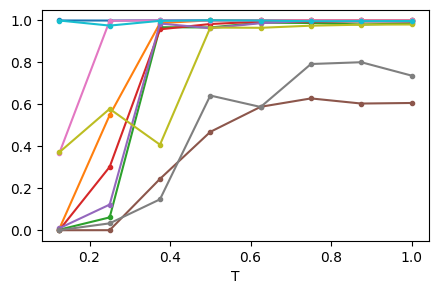

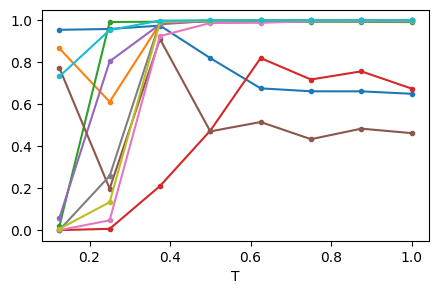

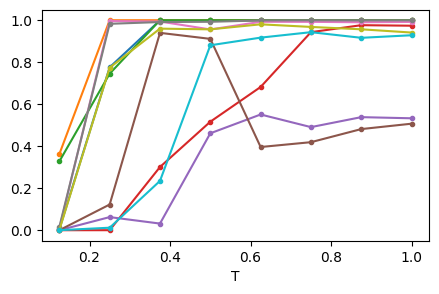

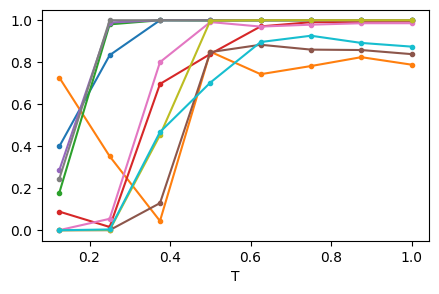

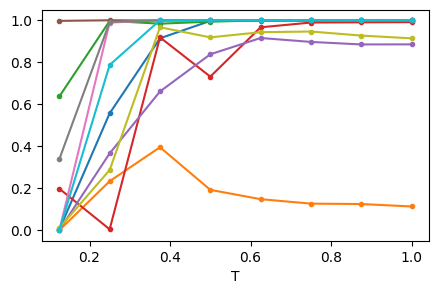

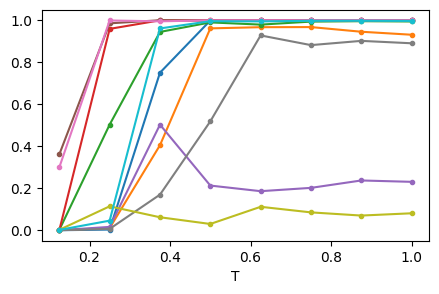

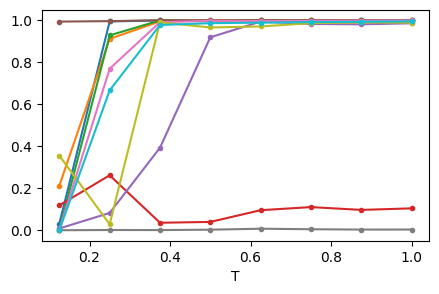

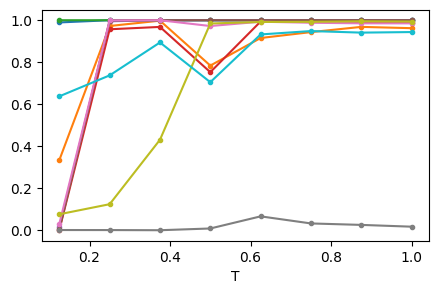

In [65]:
random.seed(0)

for _ in range(10):
    samples = random.sample(range(10000), 10)
    # set figure size
    plt.figure(figsize=(5, 3))
    for i in samples:
        # probs_i = probs_pa[:, i, targets[i]].cpu()
        probs_i = probs[:, i, targets[i]].cpu()
        plt.plot([x / len(probs_i) for x in list(range(1, len(probs_i) + 1))], probs_i, label=f'{i}', marker='o', ms=3);
    plt.xlabel('T')
    plt.show()

In [49]:
# MSDNet results copied from AnytimeClassification repo (UvA Desktop)
ACC_MSDNet = [0.8957, 0.9073, 0.9163, 0.9215, 0.9248, 0.9284, 0.9293]
MONO_MSDNet = {0.01: 23.68, 0.05: 17.580000000000002, 0.1: 15.06, 0.2: 12.01, 0.5: 6.74}

# average batch inference time (b=32)
T_MSDNet = 0.021
T_MDEQ = 0.2  # LARGE model (threshold=10)

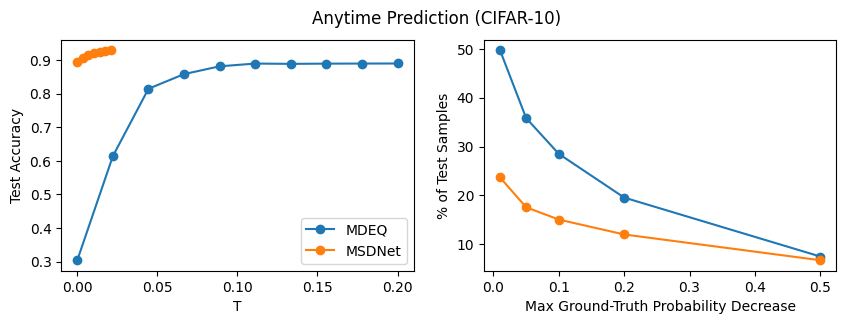

In [54]:

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].plot(np.linspace(0, T_MDEQ, len(acc)), torch.stack(acc, dim=0).cpu().numpy(), label='MDEQ', marker='o',)
ax[0].plot(np.linspace(0, T_MSDNet, len(ACC_MSDNet)), ACC_MSDNet, label='MSDNet', marker='o',)
ax[0].legend()
ax[0].set_ylabel('Test Accuracy')
ax[0].set_xlabel('T')

modal_probs = conditional_monotonicity_check(targets, probs)
ax[1].plot(modal_probs.keys(), modal_probs.values(), marker='o', label='MDEQ')
ax[1].plot(MONO_MSDNet.keys(), MONO_MSDNet.values(), marker='o', label='MSDNet')

ax[1].set_xlabel('Max Ground-Truth Probability Decrease')
ax[1].set_ylabel('% of Test Samples')


plt.suptitle(f'Anytime Prediction (CIFAR-10)')
plt.show()